<a href="https://colab.research.google.com/github/rajeshmore1/DataScience_Mentorship/blob/main/NLP_1_Introduction_To_NLP(Data_Cleaning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction To NLP:

Natural Language Processing, or NLP, is the sub-field of AI that is focused on enabling computers to understand and process human languages. Let’s check out how NLP works and learn how to write programs that can extract information out of raw text using Python!

# Can Computers Understand Language?
As long as computers have been around, programmers have been trying to write programs that understand languages like English. The reason is pretty obvious — humans have been writing things down for thousands of years and it would be really helpful if a computer could read and understand all that data.

Computers can’t yet truly understand English in the way that humans do — but they can already do a lot! In certain limited areas, what you can do with NLP already seems like magic. You might be able to save a lot of time by applying NLP techniques to your own projects.

And even better, the latest advances in NLP are easily accessible through open source Python libraries like **spaCy, textacy, and neuralcoref.** What you can do with just a few lines of python is amazing.

# Use Cases of NLP
In simple terms, NLP represents the automatic handling of natural human language like speech or text, and although the concept itself is fascinating, the real value behind this technology comes from the use cases.

NLP can help you with lots of tasks and the fields of application just seem to increase on a daily basis. Let’s mention some examples:

1. NLP enables the recognition and prediction of diseases based on electronic health records and patient’s own speech. This capability is being explored in health conditions that go from cardiovascular diseases to depression and even schizophrenia. For example, Amazon Comprehend Medical is a service that uses NLP to extract disease conditions, medications and treatment outcomes from patient notes, clinical trial reports and other electronic health records.

2. Organizations can determine what customers are saying about a service or product by identifying and extracting information in sources like social media. This sentiment analysis can provide a lot of information about customers choices and their decision drivers.
3. An inventor at IBM developed a cognitive assistant that works like a personalized search engine by learning all about you and then remind you of a name, a song, or anything you can’t remember the moment you need it to.
4. Companies like Yahoo and Google filter and classify your emails with NLP by analyzing text in emails that flow through their servers and stopping spam before they even enter your inbox.
5. To help identifying fake news, the NLP Group at MIT developed a new system to determine if a source is accurate or politically biased, detecting if a news source can be trusted or not.

6. Amazon’s Alexa and Apple’s Siri are examples of intelligent voice driven interfaces that use NLP to respond to vocal prompts and do everything like find a particular shop, tell us the weather forecast, suggest the best route to the office or turn on the lights at home.
7. Having an insight into what is happening and what people are talking about can be very valuable to financial traders. NLP is being used to track news, reports, comments about possible mergers between companies, everything can be then incorporated into a trading algorithm to generate massive profits. Remember: buy the rumor, sell the news.
8. NLP is also being used in both the search and selection phases of talent recruitment, identifying the skills of potential hires and also spotting prospects before they become active on the job market.
9. Powered by IBM Watson NLP technology, LegalMation developed a platform to automate routine litigation tasks and help legal teams save time, drive down costs and shift strategic focus.

NLP is particularly booming in the healthcare industry. This technology is improving care delivery, disease diagnosis and bringing costs down while healthcare organizations are going through a growing adoption of electronic health records. The fact that clinical documentation can be improved means that patients can be better understood and benefited through better healthcare. The goal should be to optimize their experience, and several organizations are already working on this.


# Step1 Data Cleaning in NLP
The raw text data comes directly after the various sources are not cleaned. We apply multiple steps to make data clean. Un-cleaned text data contains useless information that deviates results, so it’s always the first step to clean the data. Some standard preprocessing techniques should be applied to make data cleaner. Cleaned data also prevent models from overfitting.

In this article, we will see the following topics under text processing and exploratory data analysis.

I am converting the raw text data into a pandas data frame and performing various data cleaning techniques.

In [2]:
import pandas as pd 
text = ['This is the NLP TASKS ARTICLE written by ABhishek Jaiswal** ','IN this article ''ll be explaining various DATA-CLEANING techniques',
 'So stay tuned for FURther More &&','Nah I don"t think he goes to usf, he lives around']
df = pd.DataFrame({'text':text})

In [3]:
df

,text
0,This is the NLP TASKS ARTICLE written by ABhis...
1,IN this article ll be explaining various DATA-...
2,So stay tuned for FURther More &&
3,"Nah I don""t think he goes to usf, he lives around"


## Lowercasing
The method lower()converts all uppercase characters into lowercase and returns.

Applying lower() method using lambda function

In [4]:
df['lower'] = df['text'].apply(lambda x: " ".join(x.lower()  for x in x.split()))
df

,text,lower
0,This is the NLP TASKS ARTICLE written by ABhis...,this is the nlp tasks article written by abhis...
1,IN this article ll be explaining various DATA-...,in this article ll be explaining various data-...
2,So stay tuned for FURther More &&,so stay tuned for further more &&
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around"


## Punctuation Removal 
Removing punctuation(*,&,%#@#()) is a crucial step since punctuation doesn’t add any extra information or value to our data. Hence, removing punctuation reduces the data size; therefore, it improves computational efficiency.

This step can be done using the Regex or Replace method.

In [5]:
import string # string.punctuation returns a string containing all punctuations.
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
df.text.apply(lambda x: "".join(i for i in x if i not in string.punctuation))

0    This is the NLP TASKS ARTICLE written by ABhis...
1    IN this article ll be explaining various DATAC...
2                      So stay tuned for FURther More 
3      Nah I dont think he goes to usf he lives around
Name: text, dtype: object

In [8]:
# alternative way - using re
import re
df.text.apply(lambda x:''.join(re.findall(r'[a-zA-Z+" "]',x)))

0    This is the NLP TASKS ARTICLE written by ABhis...
1    IN this article ll be explaining various DATAC...
2                      So stay tuned for FURther More 
3     Nah I don"t think he goes to usf he lives around
Name: text, dtype: object

## Stop Words Removal
Words that frequently occur in sentences and carry no significant meaning in sentences. These are not important for prediction, so we remove stopwords to reduce data size and prevent overfitting. Note: Before filtering stopwords, make sure you lowercase the data since our stopwords are lowercase.

Using the NLTK library, we can filter out our Stopwords from the dataset.

In [9]:
# !pip install nltk
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')
df.lower.apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0         nlp tasks article written abhishek jaiswal**
1    article explaining various data-cleaning techn...
2                                        stay tuned &&
3               nah don"t think goes usf, lives around
Name: lower, dtype: object

## Spelling Correction
Most of the text data extracted in customer reviews, blogs, or tweets have some chances of spelling mistakes.

Correcting spelling mistakes improves model accuracy.

There are various libraries to fix spelling mistakes, but the most convenient method is to use a text blob.

The method correct() works on text blob objects and corrects the spelling mistakes.

In [10]:
#Install textblob library 
!pip install textblob 
from textblob import TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
df['lower'].apply(lambda x: str(TextBlob(x).correct()))

0    this is the nap tasks article written by abhis...
1    in this article ll be explaining various data-...
2                    so stay tuned for further more &&
3      ah i don"t think he goes to us, he lives around
Name: lower, dtype: object

## Tokenization
Tokenization means splitting text into meaningful unit words. There are sentence tokenizers as well as word tokenizers.

Sentence tokenizer splits a paragraph into meaningful sentences, while word tokenizer splits a sentence into unit meaningful words. Many libraries can perform tokenization like SpaCy, NLTK, and TextBlob.

Splitting a sentence on space to get individual unit words can be understood as tokenization.

In [13]:
import nltk
nltk.download('punkt')
mystring = "My favorite animal is cat" 
nltk.word_tokenize(mystring)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['My', 'favorite', 'animal', 'is', 'cat']

In [14]:
mystring.split(" ")


['My', 'favorite', 'animal', 'is', 'cat']

## Stemming
Stemming is converting words into their root word using some set of rules irrespective of meaning. I.e.,

* “fish,” “fishes,” and “fishing” are stemmed into “fish”.
* “playing”, “played”,” plays” are stemmed into “play”.
* Stemming helps to reduce the vocabulary hence improving the accuracy.

The simplest way to perform stemming is to use NLTK or a TextBlob library.

NLTK provides various stemming techniques, i.e. Snowball, PorterStemmer; different technique follows different sets of rules to convert words into their root word.

In [15]:
import nltk
# “article” is stemmed into “articl“, “lives“ — -> “live“.
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['text'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))

0    thi is the nlp task articl written by abhishek...
1    in thi articl ll be explain variou data-clean ...
2                     so stay tune for further more &&
3      nah i don"t think he goe to usf, he live around
Name: text, dtype: object

## Lemmatization
Lemmatization is converting words into their root word using vocabulary mapping. Lemmatization is done with the help of part of speech and its meaning; hence it doesn’t generate meaningless root words. But lemmatization is slower than stemming.

* “good,” “better,” or “best” is lemmatized into “good“.
* Lemmatization will convert all synonyms into a single root word. i.e. * “automobile“, “car“,” truck“,” vehicles” are lemmatized into “automobile”.
* Lemmatization usually gets better results.

Ie. leafs Stemmed to. leaves stemmed to leav while leafs , leaves lemmatized to leaf

Lemmatization can be done using NLTK, TextBlob library.

#### Wordnet Lemmatizer with NLTK

Wordnet is an large, freely and publicly available lexical database for the English language aiming to establish structured semantic relationships between words.

It offers lemmatization capabilities as well and is one of the earliest and most commonly used lemmatizers.

NLTK offers an interface to it, but you have to download it first in order to use it. Follow the below instructions to install nltk and download wordnet.

In [32]:
# How to install and import NLTK
# In terminal or prompt:
# pip install nltk

# # Download Wordnet through NLTK in python console:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [35]:
# In order to lemmatize, you need to create an instance of the WordNetLemmatizer() and call the lemmatize() function on a single word.

import nltk
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize Single Word
print(lemmatizer.lemmatize("bats"))

bat


## Lemmatize the whole dataset.



In [37]:
import textblob
from textblob import Word
df['lower'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

0    this is the nlp task article written by abhish...
1    in this article ll be explaining various data-...
2                    so stay tuned for further more &&
3       nah i don"t think he go to usf, he life around
Name: lower, dtype: object

# Step 2 Exploratory Data Analysis
So far, we have seen the various text preprocessing techniques that must be done after getting the raw data. After cleaning our data, we now can perform exploratory data analysis and explore and understand the text data.

## Word Frequency in Data
Counting the unique words in our data gives an idea about our data’s most frequent, least frequent terms. Often we drop the least frequent comments to make our model training more generalized.

nltk provides Freq_dist class to calculate word frequency, and it takes a bag of words as input.

In [38]:
all_words = []
for sentence in df['lower']:
    all_words.extend(sentence.split())

all_words Contain all the words available in our dataset. We often call it vocabulary.



In [43]:
import nltk
from nltk import FreqDist
nltk.FreqDist(all_words)

FreqDist({'this': 2, 'article': 2, 'he': 2, 'is': 1, 'the': 1, 'nlp': 1, 'tasks': 1, 'written': 1, 'by': 1, 'abhishek': 1, ...})

## Word Cloud
Wordcloud is the pictorial representation of the word frequency of the dataset.WordCloud is easier to understand and gives a better idea about our textual data.

The library wordcloud Let us create a word cloud in a few lines of code.

importing libraries :

In [44]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS  
import matplotlib.pyplot as plt

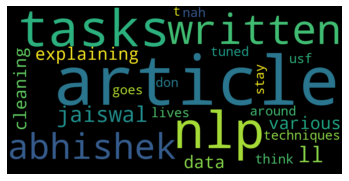

In [46]:
# We can draw a word cloud using text containing all the words of our data.

words = []
for message in df['lower']:
    words.extend([word for word in message.split() if word not in STOPWORDS])
        
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* background_color = 'white' using this parameter, we can change the background colour of the word cloud.

* collocations = False Keeping it as False will ignore the collocation words. Collocations are those words that are formed by those words which occur together. I.e. pay attention, home works, etc.

* We can adjust height and width using the parameters.

Note : Before making the word cloud always remove the stopwords.